In [1]:
!pip install ultralytics opencv-python-headless torchvision matplotlib --quiet

import cv2
import numpy as np
import torch
import torch.nn.functional as F
from ultralytics import YOLO
from torchvision import models, transforms
import matplotlib.pyplot as plt

In [2]:
model = YOLO("best.pt")  # Provided model

resnet = models.resnet18(pretrained=True)
resnet.fc = torch.nn.Identity()
resnet.eval()

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

def get_embedding(crop):
    tensor = transform(crop).unsqueeze(0)
    with torch.no_grad():
        return resnet(tensor).squeeze(0)

C:\Users\tyagi\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\tyagi\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
def reid_single_video(video_path, max_frames=100, sim_thresh=0.85):
    cap = cv2.VideoCapture(video_path)
    player_db = []
    id_counter = 0

    frame_idx = 0
    while frame_idx < max_frames:
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)
        boxes = results[0].boxes.xyxy.cpu().numpy()

        for box in boxes:
            x1, y1, x2, y2 = map(int, box[:4])
            crop = frame[y1:y2, x1:x2]
            emb = get_embedding(crop)

            assigned_id = None
            for pid, ref_emb in player_db:
                sim = F.cosine_similarity(emb.unsqueeze(0), ref_emb.unsqueeze(0)).item()
                if sim > sim_thresh:
                    assigned_id = pid
                    break

            if assigned_id is None:
                assigned_id = id_counter
                player_db.append((assigned_id, emb))
                id_counter += 1

            # Draw on frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
            cv2.putText(frame, f"ID: {assigned_id}", (x1, y1-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

        if frame_idx % 20 == 0:  # Visualize every 20 frames
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f"Frame {frame_idx}")
            plt.axis("off")
            plt.show()

        frame_idx += 1

    cap.release()



0: 384x640 1 ball, 16 players, 2 referees, 816.1ms
Speed: 9.2ms preprocess, 816.1ms inference, 13.4ms postprocess per image at shape (1, 3, 384, 640)


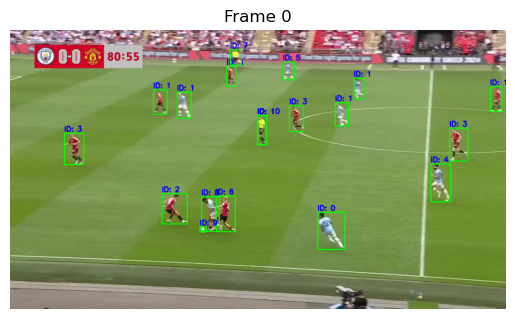


0: 384x640 18 players, 2 referees, 687.4ms
Speed: 1.6ms preprocess, 687.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 16 players, 2 referees, 729.5ms
Speed: 2.1ms preprocess, 729.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14 players, 2 referees, 696.8ms
Speed: 2.0ms preprocess, 696.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 14 players, 2 referees, 713.8ms
Speed: 3.3ms preprocess, 713.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 16 players, 2 referees, 678.7ms
Speed: 2.7ms preprocess, 678.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 2 referees, 784.4ms
Speed: 1.9ms preprocess, 784.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 15 players, 1 referee, 718.9ms
Speed: 2.0ms preprocess, 718.9ms inference, 1.0ms postprocess per image a

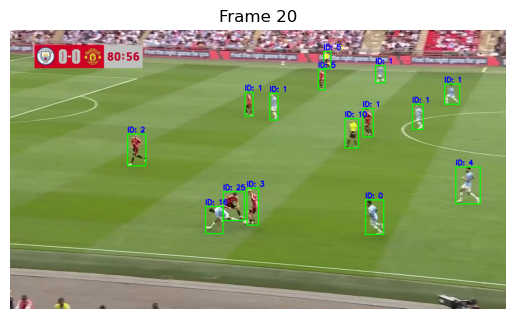


0: 384x640 14 players, 4 referees, 744.8ms
Speed: 2.1ms preprocess, 744.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3 referees, 869.1ms
Speed: 3.7ms preprocess, 869.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3 referees, 831.6ms
Speed: 1.9ms preprocess, 831.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 2 referees, 788.5ms
Speed: 1.7ms preprocess, 788.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3 referees, 784.8ms
Speed: 2.8ms preprocess, 784.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 3 referees, 746.2ms
Speed: 2.3ms preprocess, 746.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 13 players, 2 referees, 780.4ms
Speed: 1.7ms preprocess, 780.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640

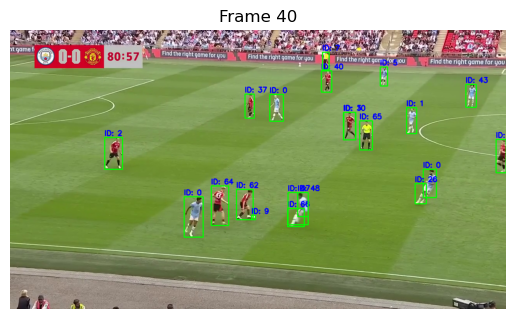


0: 384x640 16 players, 3 referees, 797.3ms
Speed: 3.3ms preprocess, 797.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 players, 2 referees, 836.8ms
Speed: 3.6ms preprocess, 836.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 17 players, 2 referees, 805.2ms
Speed: 1.9ms preprocess, 805.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 18 players, 2 referees, 814.9ms
Speed: 2.1ms preprocess, 814.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 17 players, 2 referees, 785.3ms
Speed: 1.8ms preprocess, 785.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 players, 3 referees, 761.4ms
Speed: 1.9ms preprocess, 761.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 17 players, 2 referees, 779.4ms
Speed: 2.0ms preprocess, 779.4ms inference, 1.1ms postprocess per image 

In [5]:
reid_single_video("15sec_input_720p.mp4", max_frames=60)